In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 15})

#G=Goal, OG=Own Goal, Y=Yellow Card, R=Red Card, SY = Red Card by second yellow, P=Penalty, MP=Missed Penalty, I = Substitution In, O=Substitute Out, IH= In half time?

df_matches=pd.read_csv('data_raw/WorldCupMatches.csv', sep=',')
df_players=pd.read_csv('data_raw/WorldCupPlayers.csv', sep=',')
df_cups=pd.read_csv('data_raw/WorldCups.csv', sep=',')

df_events = pd.read_csv('data_prepared/event.csv', sep=',').replace(np.nan, '', regex=True)

Year
1930     70
1934     70
1938     84
1950     88
1954    140
1958    126
1962     89
1966     89
1970     95
1974     97
1978    102
1982    146
1986    132
1990    115
1994    141
1998    171
2002    161
2006    147
2010    145
2014    171
dtype: int64


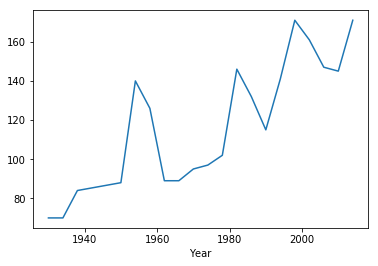

In [2]:
# at first a few descriptive statistics about the goals made during all the world cups

# * How many Goals per Worldcup?
goals_per_match = df_events.groupby(['MatchID'])[['Year', 'Home Team Goals', 'Away Team Goals']].mean()
goals_per_world_cup = goals_per_match.groupby(['Year'])[['Home Team Goals', 'Away Team Goals']].sum()
print(goals_per_world_cup.sum(1))
goals_per_world_cup.sum(1).plot()
plt.show()


     Average Goals per Game
                           
Year                       
1930               0.257143
1934               0.242857
1938               0.214286
1950               0.250000
1954               0.185714
1958               0.277778
1962               0.359551
1966               0.359551
1970               0.336842
1974               0.391753
1978               0.372549
1982               0.356164
1986               0.393939
1990               0.452174
1994               0.368794
1998               0.374269
2002               0.397516
2006               0.435374
2010               0.441379
2014               0.374269


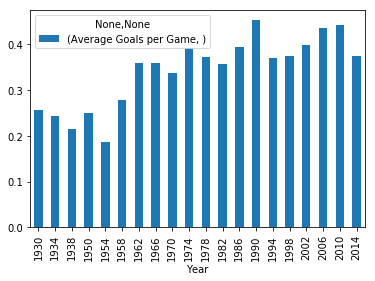

In [3]:
# Okay seems like more goals occured lately, so lets check the average goals per game for each world cup

goals_per_match_ratio = df_events.groupby(['MatchID'])[['MatchID', 'Year', 'Home Team Goals', 'Away Team Goals']].mean()
goals_per_match_ratio = goals_per_match_ratio.assign(total = lambda x: x['Home Team Goals'] + x['Away Team Goals'])
goals_per_match_ratio = goals_per_match_ratio[['MatchID', 'Year', 'total']]
goals_per_match_ratio = goals_per_match_ratio.groupby(['Year'])[['MatchID', 'total']].agg({'MatchID' : ['size'], 'total' : ['sum']})
goals_per_match_ratio = goals_per_match_ratio.rename(columns={'size':'Number of Games', 'sum' : 'Amount of Goals'})
goals_per_match_ratio = goals_per_match_ratio.assign(average = lambda x: (x['MatchID']['Number of Games'].astype(dtype=float) / x['total']['Amount of Goals'].astype(dtype=float)) )
goals_per_match_ratio = goals_per_match_ratio[['average']].rename(columns={'average':'Average Goals per Game'})
print(goals_per_match_ratio)
goals_per_match_ratio.plot(kind='bar')
plt.show()

# Well it seems that yes, the average number of goals per game increased since 1930
# but lately the average was more or less consistent with some peaks in the 00´s

In [4]:
# Next up we ask ourself: has the goalkeeper ever shot a goal?

goal_keeper_goal = df_events.loc[(df_events['EventType'] == 'G') & (df_events['Position'] == 'GK')]

print(goal_keeper_goal)
# Unfortunately no goal keeper has ever shot a goal during world cup

Empty DataFrame
Columns: [Year, Datetime, Stage, Stadium, City, Home Team Name, Home Team Goals, Away Team Goals, Away Team Name, Attendance, Half-time Home Goals, Half-time Away Goals, Referee, Assistant 1, Assistant 2, RoundID, MatchID, Home Team Initials, Away Team Initials, Team Initials, Coach Name, Line-up, Shirt Number, Player Name, Position, EventType, EventMinute, ExtraTime, Penalty, GoldenGoal, DecisionPenaltyAway, DecisionPenaltyHome, HomeTeamWins, AwayTeamWins, EventOfHomeTeam, EventOfWinner, EventOfLoser, HourGameStart, StageRank]
Index: []

[0 rows x 39 columns]


In [5]:
# Next Question is: Does the team from from the country hosting the event perform better than otherwise?

# Therefore first check the 